In [1]:
# import necessary packages
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os
import glob
import cv2
import numpy as np
#from skimage import data, io, filters
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D
from PIL import Image, ImageEnhance
#from keras.utils import np_utils

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
imagePaths = list(paths.list_images("/content/drive/MyDrive/data"))
print(imagePaths)

['/content/drive/MyDrive/data/Normal/dysgraphia_467_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_990_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1358_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_858_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_754_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_821_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_850_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_803_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1356_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1337_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_859_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1029_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_844_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_927_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_984_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1014_no.jpg', '/content/drive/MyDrive/data/Norma

In [53]:
#To read and preprocess image data
data = []
lables = []
c = 0 ## to see the progress
for image in imagePaths:

    lable = os.path.split(image)[1].split('_')[-1].split('.')[0]
    #print(lable)
    # lables.append(lable)
    #im_gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img=Image.open(image)
    # img = cv2.imread(image)
    img=img.resize((512,512))
    enhancer = ImageEnhance.Sharpness(img.convert('RGB'))
    img=enhancer.enhance(20)
   
    img=np.array(img)
    height, width, channels = img.shape
# Number of pieces Horizontally
    W_SIZE  = 2
    # Number of pieces Vertically to each Horizontal
    H_SIZE = 2

    for ih in range(H_SIZE ):
      for iw in range(W_SIZE ):

          x = width/W_SIZE * iw
          y = height/H_SIZE * ih
          h = (height / H_SIZE)
          w = (width / W_SIZE )
          #print(x,y,h,w)
          data.append(img[int(y):int(y+h), int(x):int(x+w)])
          lables.append(lable)

          # cv2.imwrite("Output Images/" + str(ih)+str(iw) +  ".png",img)
          # img = img2
    print(img.shape)
    #data.append(img)
    c=c+1
    print(c)


(512, 512, 3)
1
(512, 512, 3)
2
(512, 512, 3)
3
(512, 512, 3)
4
(512, 512, 3)
5
(512, 512, 3)
6
(512, 512, 3)
7
(512, 512, 3)
8
(512, 512, 3)
9
(512, 512, 3)
10
(512, 512, 3)
11
(512, 512, 3)
12
(512, 512, 3)
13
(512, 512, 3)
14
(512, 512, 3)
15
(512, 512, 3)
16
(512, 512, 3)
17
(512, 512, 3)
18
(512, 512, 3)
19
(512, 512, 3)
20
(512, 512, 3)
21
(512, 512, 3)
22
(512, 512, 3)
23
(512, 512, 3)
24
(512, 512, 3)
25
(512, 512, 3)
26
(512, 512, 3)
27
(512, 512, 3)
28
(512, 512, 3)
29
(512, 512, 3)
30
(512, 512, 3)
31
(512, 512, 3)
32
(512, 512, 3)
33
(512, 512, 3)
34
(512, 512, 3)
35
(512, 512, 3)
36
(512, 512, 3)
37
(512, 512, 3)
38
(512, 512, 3)
39
(512, 512, 3)
40
(512, 512, 3)
41
(512, 512, 3)
42
(512, 512, 3)
43
(512, 512, 3)
44
(512, 512, 3)
45
(512, 512, 3)
46
(512, 512, 3)
47
(512, 512, 3)
48
(512, 512, 3)
49
(512, 512, 3)
50
(512, 512, 3)
51
(512, 512, 3)
52
(512, 512, 3)
53
(512, 512, 3)
54
(512, 512, 3)
55
(512, 512, 3)
56
(512, 512, 3)
57
(512, 512, 3)
58
(512, 512, 3)
59
(512, 

In [54]:
# encode the labels as integer
data = np.array(data)
print(data.shape)
lables = np.array(lables)

(824, 256, 256, 3)


In [55]:
print(set(lables))

{'no', 'yes'}


In [56]:
le = LabelEncoder()
lables = le.fit_transform(lables)

myset = set(lables)
print(myset)

{0, 1}


In [57]:

#Splitting of dataset into training and test dataset
(trainX, testX, trainY, testY ) = train_test_split(data, lables, test_size= 0.10, shuffle = True, random_state=42,stratify=lables)

trainY=trainY.reshape(len(trainY),1)
testY=testY.reshape(len(testY),1)
# valY=valY.reshape(len(valY),1)
print("X_train shape", trainX.shape)
print("y_train shape", trainY.shape)
print("X_test shape", testX.shape)
print("y_test shape", testY.shape)


X_train shape (741, 256, 256, 3)
y_train shape (741, 1)
X_test shape (83, 256, 256, 3)
y_test shape (83, 1)


In [58]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label = preprocessing.LabelEncoder()
trainY= label.fit_transform(trainY)
testY= label.fit_transform(testY)
# valY= label.fit_transform(valY)
# print(valY)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


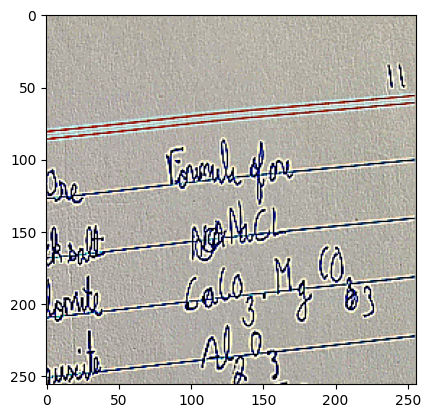

In [59]:
plt.imshow(trainX[126,:])

**resnet Model**


**Data Augmentation**

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model
# data augmentation
datagen = ImageDataGenerator(

        zca_whitening=False,  # dimesion reduction
        #rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        #horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(trainX)



# datagen.fit(valX)

**Transfer Learning using resnet (Imagenet)**

In [61]:
from tensorflow.keras.applications.resnet50 import ResNet50

conv_base=ResNet50(weights='imagenet',
                include_top=False,##we only want to use "conv" base
                input_shape=(256,256,3))

94765736/94765736 [==============================] - 0s 0us/step


In [62]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [63]:
model_3=Sequential()

model_3.add(conv_base)
model_3.add(Flatten())
model_3.add(Dense(512,activation='relu'))
model_3.add(Dense(128,activation='relu'))
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(1,activation='sigmoid'))

In [64]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_8 (Dense)             (None, 512)               67109376  
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 90771073 (346.26 MB)
Trainable params: 9

In [65]:
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf
#from tensorflow_addons.optimizers import AdamW
from tensorflow.keras.optimizers import SGD
opt = Adam(lr=0.0001)
model_3.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [66]:
history_VGG=model_3.fit(
   datagen.flow(trainX,trainY),
                              epochs = 20

)

Epoch 1/20
24/24 [==============================] - 53s 675ms/step - loss: 1.8477 - accuracy: 0.8502
Epoch 2/20
24/24 [==============================] - 15s 600ms/step - loss: 0.5302 - accuracy: 0.9325
Epoch 3/20
24/24 [==============================] - 15s 625ms/step - loss: 0.5542 - accuracy: 0.9136
Epoch 4/20
24/24 [==============================] - 15s 601ms/step - loss: 0.1847 - accuracy: 0.9258
Epoch 5/20
24/24 [==============================] - 17s 690ms/step - loss: 0.1254 - accuracy: 0.9514
Epoch 6/20
24/24 [==============================] - 15s 600ms/step - loss: 1.5825 - accuracy: 0.9433
Epoch 7/20
24/24 [==============================] - 14s 587ms/step - loss: 0.5436 - accuracy: 0.8677
Epoch 8/20
24/24 [==============================] - 15s 601ms/step - loss: 0.1995 - accuracy: 0.9312
Epoch 9/20
24/24 [==============================] - 16s 627ms/step - loss: 0.3481 - accuracy: 0.9258
Epoch 10/20
24/24 [==============================] - 15s 602ms/step - loss: 1.1833 - accura

In [67]:
trainY[1]

0

In [68]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score


In [69]:

acc = history_VGG.history['accuracy']
# val_acc = history_VGG.history['val_accuracy']

loss = history_VGG.history['loss']
# val_loss = history_VGG.history['val_loss']

In [70]:
print(acc,loss)

[0.8502024412155151, 0.9325236082077026, 0.9136302471160889, 0.9257760047912598, 0.9514170289039612, 0.9433198571205139, 0.8677462935447693, 0.931174099445343, 0.9257760047912598, 0.8812415599822998, 0.9271255135536194, 0.9487179517745972, 0.9500674605369568, 0.9608637094497681, 0.9649122953414917, 0.9595141410827637, 0.9257760047912598, 0.958164632320404, 0.9514170289039612, 0.958164632320404] [1.847663164138794, 0.5301593542098999, 0.5541681051254272, 0.1847456693649292, 0.1254032552242279, 1.582460880279541, 0.5435912013053894, 0.1994871348142624, 0.3481195271015167, 1.1832709312438965, 1.2867507934570312, 0.31611403822898865, 0.16743475198745728, 0.14873269200325012, 0.17715515196323395, 0.15383172035217285, 0.23082347214221954, 0.13063670694828033, 0.13507407903671265, 0.17473167181015015]


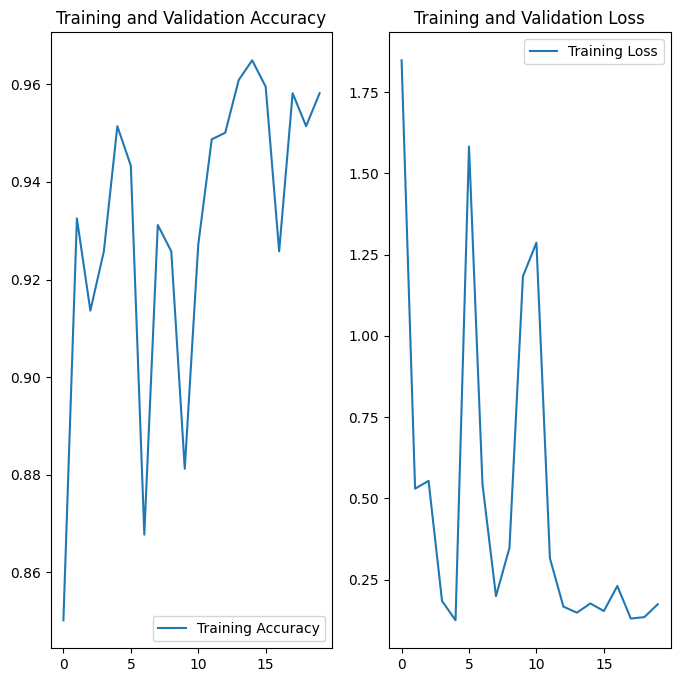

In [71]:
EPOCHS=20
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
# plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
# plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
scores = model_3.evaluate(testX, testY)
print("\nLoss: %.2f%%" % (scores[1]*100))

3/3 [==============================] - 3s 920ms/step - loss: 0.2820 - accuracy: 0.9157

Loss: 91.57%


3/3 [==============================] - 1s 135ms/step
Accuracy: 0.9156626506024096
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        44
           1       1.00      0.82      0.90        39

    accuracy                           0.92        83
   macro avg       0.93      0.91      0.91        83
weighted avg       0.93      0.92      0.91        83

0.8205128205128205
1.0


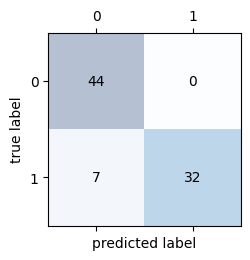

<Axes: >

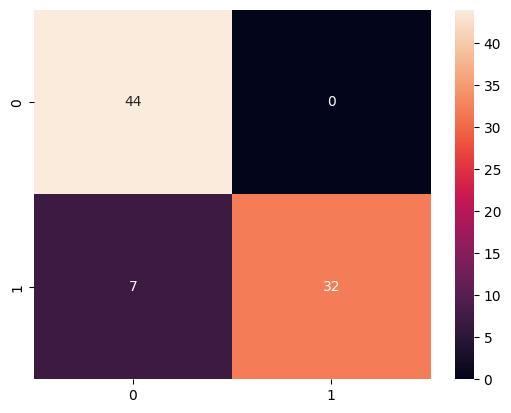

In [73]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
predictions = model_3.predict(testX)

predictions = predictions>0.5
#print(predictions)
from sklearn.metrics import classification_report
print("Accuracy:",metrics.accuracy_score(testY, predictions))
print(classification_report(testY, predictions))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=testY, y_pred=predictions)
sensitivity = recall_score(testY, predictions)
print(sensitivity)
specificity=confmat[0][0]/ (confmat[0][0] + confmat[0][1])
print(specificity)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
     ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
import seaborn as sns
sns.heatmap(confmat, annot=True)

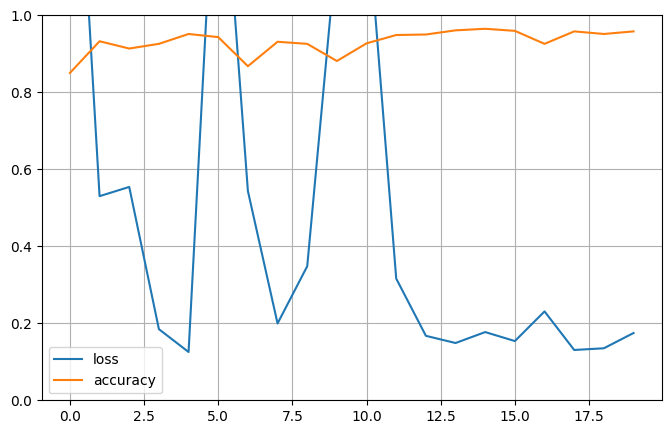

In [74]:
import pandas as pd
pd.DataFrame(history_VGG.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [75]:
scores = model_3.evaluate(testX, testY)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

3/3 [==============================] - 0s 104ms/step - loss: 0.2820 - accuracy: 0.9157

Accuracy: 91.57%


In [76]:
from sklearn.metrics import roc_curve
y_pred_keras = model_3.predict(testX).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(testY, y_pred_keras)

3/3 [==============================] - 0s 143ms/step


In [77]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

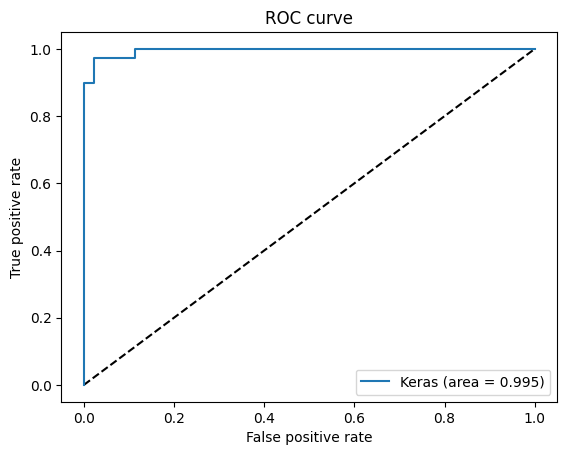

In [78]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [79]:
import pickle

pickle.dump(model_3,open('resnet_segmented.pkl','wb'))